# Variable profiling and checking relationships between variables:


##### Loading the dataset saved earlier and analysis to generate insights

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('airbnb_cleaned.csv')

In [3]:
df

,listing_id,available,price,adjusted_price,minimum_nights,maximum_nights,listing_url,name,latitude,longitude,...,accomodates,bathrooms_text,bedrooms,beds,amenities,host_id,host_name,host_since,host_location,total_reviews
0,50904,0.0,166.67,158.67,1.00,60.0,https://www.airbnb.com/rooms/50904,aplace/antwerp: cosy suite - fashion district,51.218575,4.398631,...,2,1 private bath,1.000000,1.0,"[""Kitchen"", ""Smoke alarm"", ""Hair dryer"", ""Keyp...",234077,Karin,2010-09-14,"Antwerp, Flanders, Belgium",2.0
1,891884,0.0,175.00,175.00,1.67,1125.0,https://www.airbnb.com/rooms/891884,aplace/antwerp: amazing suite & square view,51.218575,4.398631,...,2,1 private bath,1.000000,1.0,"[""Refrigerator"", ""Kitchen"", ""Smoke alarm"", ""Ha...",234077,Karin,2010-09-14,"Antwerp, Flanders, Belgium",2.0
2,891907,1.0,215.00,215.00,3.00,1125.0,https://www.airbnb.com/rooms/891907,aplace/antwerp: stunning flat with square view,51.218575,4.398631,...,4,1.5 baths,2.000000,2.0,"[""Refrigerator"", ""Kitchen"", ""Smoke alarm"", ""Ha...",234077,Karin,2010-09-14,"Antwerp, Flanders, Belgium",6.0
3,2543695,1.0,200.00,200.00,2.00,1125.0,https://www.airbnb.com/rooms/2543695,aplace/antwerp: gorgeous flat with square view,51.218575,4.398631,...,4,1.5 baths,2.000000,2.0,"[""Refrigerator"", ""Kitchen"", ""Smoke alarm"", ""Ha...",234077,Karin,2010-09-14,"Antwerp, Flanders, Belgium",15.0
4,116134,1.0,150.00,150.00,2.00,1125.0,https://www.airbnb.com/rooms/116134,Spacious apartment nearby Mas,51.230510,4.405930,...,4,2.5 baths,2.000000,2.0,"[""Refrigerator"", ""Elevator"", ""Paid street park...",586942,Paul,2011-05-14,"Kapellen, Flanders, Belgium",120.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1740,53913552,1.0,50.00,50.00,1.00,365.0,https://www.airbnb.com/rooms/53913552,Fantastische loft om in te vertoeven met parking,51.218570,4.435350,...,2,1 bath,1.000000,1.0,"[""Long term stays allowed"", ""Kitchen"", ""Smoke ...",164785425,Yassin,2017-12-29,"Kontich, Flanders, Belgium",0.0
1741,53916524,1.0,88.00,88.00,3.00,365.0,https://www.airbnb.com/rooms/53916524,Industrial spacious loft in Antwerp!,51.231330,4.403520,...,2,1.5 baths,1.000000,1.0,"[""Refrigerator"", ""Elevator"", ""Yamaha RX-A550 s...",46300712,Michael,2015-10-11,"Antwerp, Flanders, Belgium",0.0
1742,53928545,1.0,49.00,49.00,20.00,1125.0,https://www.airbnb.com/rooms/53928545,Studio in het midden van Antwerpen,51.213210,4.397080,...,2,1 bath,1.055402,1.0,"[""Hot water"", ""Long term stays allowed"", ""Kitc...",74268936,Jürgen,2016-05-27,"Waalwijk, North Brabant, Netherlands",0.0
1743,53949105,1.0,990.00,990.00,2.00,1125.0,https://www.airbnb.com/rooms/53949105,Kasteel Boterlaerhof vlakbij Antwerpen,51.212320,4.482230,...,16,7.5 baths,7.000000,33.0,"[""Refrigerator"", ""Private garden or backyard"",...",377595714,Kelly,2020-11-30,BE,0.0


In [4]:
df.columns

Index(['listing_id', 'available', 'price', 'adjusted_price', 'minimum_nights',
       'maximum_nights', 'listing_url', 'name', 'latitude', 'longitude',
       'property_type', 'room_type', 'accomodates', 'bathrooms_text',
       'bedrooms', 'beds', 'amenities', 'host_id', 'host_name', 'host_since',
       'host_location', 'total_reviews'],
      dtype='object')

## Feature Engineering


In [5]:
df['host_since'] = pd.to_datetime(df['host_since'])

In [6]:
df['host_since']

0      2010-09-14
1      2010-09-14
2      2010-09-14
3      2010-09-14
4      2011-05-14
          ...    
1740   2017-12-29
1741   2015-10-11
1742   2016-05-27
1743   2020-11-30
1744   2021-12-24
Name: host_since, Length: 1745, dtype: datetime64[ns]

In [7]:
basedate = pd.Timestamp('2022-04-25')
join_age = abs(df['host_since'] - basedate).dt.days
join_age

0       4241
1       4241
2       4241
3       4241
4       3999
        ... 
1740    1578
1741    2388
1742    2159
1743     511
1744     122
Name: host_since, Length: 1745, dtype: int64

In [8]:
df['join_age'] = join_age

In [9]:
df

,listing_id,available,price,adjusted_price,minimum_nights,maximum_nights,listing_url,name,latitude,longitude,...,bathrooms_text,bedrooms,beds,amenities,host_id,host_name,host_since,host_location,total_reviews,join_age
0,50904,0.0,166.67,158.67,1.00,60.0,https://www.airbnb.com/rooms/50904,aplace/antwerp: cosy suite - fashion district,51.218575,4.398631,...,1 private bath,1.000000,1.0,"[""Kitchen"", ""Smoke alarm"", ""Hair dryer"", ""Keyp...",234077,Karin,2010-09-14,"Antwerp, Flanders, Belgium",2.0,4241
1,891884,0.0,175.00,175.00,1.67,1125.0,https://www.airbnb.com/rooms/891884,aplace/antwerp: amazing suite & square view,51.218575,4.398631,...,1 private bath,1.000000,1.0,"[""Refrigerator"", ""Kitchen"", ""Smoke alarm"", ""Ha...",234077,Karin,2010-09-14,"Antwerp, Flanders, Belgium",2.0,4241
2,891907,1.0,215.00,215.00,3.00,1125.0,https://www.airbnb.com/rooms/891907,aplace/antwerp: stunning flat with square view,51.218575,4.398631,...,1.5 baths,2.000000,2.0,"[""Refrigerator"", ""Kitchen"", ""Smoke alarm"", ""Ha...",234077,Karin,2010-09-14,"Antwerp, Flanders, Belgium",6.0,4241
3,2543695,1.0,200.00,200.00,2.00,1125.0,https://www.airbnb.com/rooms/2543695,aplace/antwerp: gorgeous flat with square view,51.218575,4.398631,...,1.5 baths,2.000000,2.0,"[""Refrigerator"", ""Kitchen"", ""Smoke alarm"", ""Ha...",234077,Karin,2010-09-14,"Antwerp, Flanders, Belgium",15.0,4241
4,116134,1.0,150.00,150.00,2.00,1125.0,https://www.airbnb.com/rooms/116134,Spacious apartment nearby Mas,51.230510,4.405930,...,2.5 baths,2.000000,2.0,"[""Refrigerator"", ""Elevator"", ""Paid street park...",586942,Paul,2011-05-14,"Kapellen, Flanders, Belgium",120.0,3999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1740,53913552,1.0,50.00,50.00,1.00,365.0,https://www.airbnb.com/rooms/53913552,Fantastische loft om in te vertoeven met parking,51.218570,4.435350,...,1 bath,1.000000,1.0,"[""Long term stays allowed"", ""Kitchen"", ""Smoke ...",164785425,Yassin,2017-12-29,"Kontich, Flanders, Belgium",0.0,1578
1741,53916524,1.0,88.00,88.00,3.00,365.0,https://www.airbnb.com/rooms/53916524,Industrial spacious loft in Antwerp!,51.231330,4.403520,...,1.5 baths,1.000000,1.0,"[""Refrigerator"", ""Elevator"", ""Yamaha RX-A550 s...",46300712,Michael,2015-10-11,"Antwerp, Flanders, Belgium",0.0,2388
1742,53928545,1.0,49.00,49.00,20.00,1125.0,https://www.airbnb.com/rooms/53928545,Studio in het midden van Antwerpen,51.213210,4.397080,...,1 bath,1.055402,1.0,"[""Hot water"", ""Long term stays allowed"", ""Kitc...",74268936,Jürgen,2016-05-27,"Waalwijk, North Brabant, Netherlands",0.0,2159
1743,53949105,1.0,990.00,990.00,2.00,1125.0,https://www.airbnb.com/rooms/53949105,Kasteel Boterlaerhof vlakbij Antwerpen,51.212320,4.482230,...,7.5 baths,7.000000,33.0,"[""Refrigerator"", ""Private garden or backyard"",...",377595714,Kelly,2020-11-30,BE,0.0,511


### property_type

##### Some cleaning of property types is required as there are a large number of categories with only a few listings. The categories 'apartment', 'house' and 'other' will be used, as most properties can be classified as either apartments or houses.

In [10]:
df.property_type.value_counts()

Entire rental unit                     977
Entire loft                            110
Private room in rental unit            103
Entire condominium (condo)             102
Private room in residential home        80
Entire townhouse                        72
Private room in townhouse               66
Entire residential home                 59
Private room in bed and breakfast       27
Entire serviced apartment               24
Room in aparthotel                      24
Room in boutique hotel                  23
Private room in condominium (condo)     13
Room in hotel                           12
Entire guest suite                       6
Private room in loft                     6
Private room in guesthouse               5
Private room                             4
Private room in guest suite              3
Private room in casa particular          3
Entire villa                             3
Shared room in residential home          3
Entire guesthouse                        2
Private roo

In [11]:
property_type_dict = {
    'Room in boutique hotel':'Private',
    'Entire rental unit':'Entire',
    'Entire condominium (condo)':'Entire',
    'Private room in residential home':'Private',
    'Private room in rental unit':'Private',
    'Private room in townhouse':'Private',
    'Entire loft':'Entire',
    'Entire residential home':'Entire',
    'Private room in boat':'Private',
    'Private room in bed and breakfast':'Private',
    'Entire townhouse':'Entire',
    'Private room in loft':'Private',
    'Shared room in residential home':'Public',
    'Entire cottage':'Entire',
    'Private room':'Private',
    'Entire villa':'Entire',
    'Yurt':'Private',
    'Houseboat':'Private',
    'Private room in condominium (condo)':'Private',
    'Tent':'Private',
    'Entire serviced apartment':'Entire',
    'Tiny house':'Private',
    'Entire guest suite':'Entire',
    'Private room in guest suite':'Private',
    'Room in hotel':'Private',
    'Private room in guesthouse':'Private',
    'Private room in villa':'Private',
    'Entire guesthouse':'Entire',
    'Room in aparthotel':'Private',
    'Private room in religious building':'Private',
    'Shared room in loft':'Public',
    'Casa particular':'Private',
    'Private room in serviced apartment':'Private',
    'Shared room in bed and breakfast':'Public',
    'Private room in casa particular':'Private',
    'Shared room in casa particular':'Public',
    'Boat':'Private',
    'Entire vacation home':'Entire',
    'Castle':'Private',
}

### bathrooms, bedrooms and beds



<AxesSubplot:>

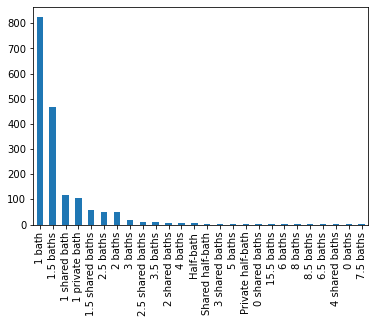

In [12]:
df['bathrooms_text'].value_counts().plot(kind='bar')

In [13]:
df['bathrooms_text'].value_counts()

1 bath               823
1.5 baths            466
1 shared bath        117
1 private bath       105
1.5 shared baths      57
2.5 baths             50
2 baths               48
3 baths               18
2.5 shared baths      10
3.5 baths             10
2 shared baths         7
4 baths                5
Half-bath              5
Shared half-bath       4
3 shared baths         4
5 baths                4
Private half-bath      2
0 shared baths         2
15.5 baths             1
6 baths                1
8 baths                1
8.5 baths              1
6.5 baths              1
4 shared baths         1
0 baths                1
7.5 baths              1
Name: bathrooms_text, dtype: int64

In [14]:
no_of_bath = {
'1 private bath': 1,
'2.5 baths': 2.5,
'1 bath': 1,
'2 shared baths': 2,
'1.5 baths': 1.5,
'Shared half-bath': 0.5,
'1.5 shared baths': 1.5,
'2 baths': 2,
'3 shared baths': 3,
'3 baths': 3,
'1 shared bath': 1,
'2.5 shared baths': 2.5,
'3.5 baths': 3.5,
'8.5 baths': 8.5,
'0 baths': 0,
'Half-bath': 0.5,
'Private half-bath': 0.5,
'5 baths': 5,
'4 shared baths': 4,
'0 shared baths': 0,
'4 baths': 4,
'6.5 baths': 6.5,
'15.5 baths': 15.5,
'8 baths': 8,
'6 baths': 6,
'7.5 baths': 7.5
}

In [15]:
df['no_of_bath'] = df['bathrooms_text'].map(no_of_bath)

In [16]:
df.head()

,listing_id,available,price,adjusted_price,minimum_nights,maximum_nights,listing_url,name,latitude,longitude,...,bedrooms,beds,amenities,host_id,host_name,host_since,host_location,total_reviews,join_age,no_of_bath
0,50904,0.0,166.67,158.67,1.00,60.0,https://www.airbnb.com/rooms/50904,aplace/antwerp: cosy suite - fashion district,51.218575,4.398631,...,1.0,1.0,"[""Kitchen"", ""Smoke alarm"", ""Hair dryer"", ""Keyp...",234077,Karin,2010-09-14,"Antwerp, Flanders, Belgium",2.0,4241,1.0
1,891884,0.0,175.00,175.00,1.67,1125.0,https://www.airbnb.com/rooms/891884,aplace/antwerp: amazing suite & square view,51.218575,4.398631,...,1.0,1.0,"[""Refrigerator"", ""Kitchen"", ""Smoke alarm"", ""Ha...",234077,Karin,2010-09-14,"Antwerp, Flanders, Belgium",2.0,4241,1.0
2,891907,1.0,215.00,215.00,3.00,1125.0,https://www.airbnb.com/rooms/891907,aplace/antwerp: stunning flat with square view,51.218575,4.398631,...,2.0,2.0,"[""Refrigerator"", ""Kitchen"", ""Smoke alarm"", ""Ha...",234077,Karin,2010-09-14,"Antwerp, Flanders, Belgium",6.0,4241,1.5
3,2543695,1.0,200.00,200.00,2.00,1125.0,https://www.airbnb.com/rooms/2543695,aplace/antwerp: gorgeous flat with square view,51.218575,4.398631,...,2.0,2.0,"[""Refrigerator"", ""Kitchen"", ""Smoke alarm"", ""Ha...",234077,Karin,2010-09-14,"Antwerp, Flanders, Belgium",15.0,4241,1.5
4,116134,1.0,150.00,150.00,2.00,1125.0,https://www.airbnb.com/rooms/116134,Spacious apartment nearby Mas,51.230510,4.405930,...,2.0,2.0,"[""Refrigerator"", ""Elevator"", ""Paid street park...",586942,Paul,2011-05-14,"Kapellen, Flanders, Belgium",120.0,3999,2.5


##### Missing values will be replaced with the median (to avoid strange fractions).

In [17]:
for col in ['no_of_bath', 'bedrooms', 'beds']:
    df[col].fillna(df[col].median(), inplace=True)

#### Dropping few unwanted columns related to host which cannot be converted to number and which are not helpful now.

In [18]:
df.drop(['listing_id','listing_url','name','latitude',
         'longitude','property_type','bathrooms_text',
         'amenities','host_id', 'host_name','host_since',
        'host_location','adjusted_price'], axis=1, inplace=True)

In [19]:
df

,available,price,minimum_nights,maximum_nights,room_type,accomodates,bedrooms,beds,total_reviews,join_age,no_of_bath
0,0.0,166.67,1.00,60.0,Hotel room,2,1.000000,1.0,2.0,4241,1.0
1,0.0,175.00,1.67,1125.0,Hotel room,2,1.000000,1.0,2.0,4241,1.0
2,1.0,215.00,3.00,1125.0,Entire home/apt,4,2.000000,2.0,6.0,4241,1.5
3,1.0,200.00,2.00,1125.0,Entire home/apt,4,2.000000,2.0,15.0,4241,1.5
4,1.0,150.00,2.00,1125.0,Entire home/apt,4,2.000000,2.0,120.0,3999,2.5
...,...,...,...,...,...,...,...,...,...,...,...
1740,1.0,50.00,1.00,365.0,Entire home/apt,2,1.000000,1.0,0.0,1578,1.0
1741,1.0,88.00,3.00,365.0,Entire home/apt,2,1.000000,1.0,0.0,2388,1.5
1742,1.0,49.00,20.00,1125.0,Entire home/apt,2,1.055402,1.0,0.0,2159,1.0
1743,1.0,990.00,2.00,1125.0,Entire home/apt,16,7.000000,33.0,0.0,511,7.5


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1745 entries, 0 to 1744
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   available       1745 non-null   float64
 1   price           1745 non-null   float64
 2   minimum_nights  1745 non-null   float64
 3   maximum_nights  1745 non-null   float64
 4   room_type       1745 non-null   object 
 5   accomodates     1745 non-null   int64  
 6   bedrooms        1745 non-null   float64
 7   beds            1745 non-null   float64
 8   total_reviews   1745 non-null   float64
 9   join_age        1745 non-null   int64  
 10  no_of_bath      1745 non-null   float64
dtypes: float64(8), int64(2), object(1)
memory usage: 150.1+ KB


## Turning columns to categorical

In [24]:
df.available.astype('category')
df.room_type.astype('category')
df.accomodates.astype('category')
df.bedrooms.astype('category')
df.beds.astype('category')
df.no_of_bath.astype('category')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\lib\pretty.py:700: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  output = repr(obj)


0       1.0
1       1.0
2       1.5
3       1.5
4       2.5
       ... 
1740    1.0
1741    1.5
1742    1.0
1743    7.5
1744    1.5
Name: no_of_bath, Length: 1745, dtype: category
Categories (16, float64): [0.0, 0.5, 1.0, 1.5, ..., 7.5, 8.0, 8.5, 15.5]

In [30]:
df.shape

(1745, 11)

### This is the final dataset and ready for model training

In [38]:
df.to_csv('airbnb_train_dataset.csv', index =False)